In [5]:
# Import necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset 
file_path = 'Zipline_Systems_Engineering_Data_Analyst_Takehome_Test.xlsx'
flight_summary_data = pd.read_excel(file_path, sheet_name='Flight Summary Data')

In [7]:
# Dataset summary
print("Data Summary:")
print(flight_summary_data.info())
print("\nSample Data:")
print(flight_summary_data.head())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   flight_id                    3055 non-null   object        
 1   asset_id                     3055 non-null   object        
 2   metro                        2939 non-null   object        
 3   takeoff_time_utc             3055 non-null   datetime64[ns]
 4   estimated_delivery_time_utc  3055 non-null   datetime64[ns]
 5   actual_delivery_time_utc     2750 non-null   datetime64[ns]
 6   docking_time_utc             3055 non-null   datetime64[ns]
 7   dock_id                      2920 non-null   object        
 8   takeoff_time_of_day          2920 non-null   object        
 9   flight_duration_s            3055 non-null   int64         
 10  ground_based_distance_m      2931 non-null   float64       
 11  customer_name                

In [8]:
# Check for duplicate rows
duplicate_rows = flight_summary_data[flight_summary_data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [9]:
# Impute missing 'ground_based_distance_m' with median
median_distance = flight_summary_data['ground_based_distance_m'].median()
flight_summary_data['ground_based_distance_m'] = flight_summary_data['ground_based_distance_m'].fillna(median_distance)

In [10]:
# Standardize Categorical Data
# Clean 'delivery_failure_reason' by replacing NaN with 'No Failure'
flight_summary_data['delivery_failure_reason'] = flight_summary_data['delivery_failure_reason'].fillna('No Failure')

In [11]:
# Handle Outliers
# Cap 'flight_duration_s' at the 99th percentile
flight_duration_cap = flight_summary_data['flight_duration_s'].quantile(0.99)
flight_summary_data['flight_duration_s'] = flight_summary_data['flight_duration_s'].clip(upper=flight_duration_cap)

In [12]:
# Ensure consistent case for categorical values
flight_summary_data['metro'] = flight_summary_data['metro'].str.title()
flight_summary_data['delivery_failure_reason'] = flight_summary_data['delivery_failure_reason'].str.title()

In [13]:
# Data Cleaning Summary
print("Data cleaning completed. Summary:")
print(flight_summary_data.info())
print("\nSample Data:")
print(flight_summary_data.head())

Data cleaning completed. Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   flight_id                    3055 non-null   object        
 1   asset_id                     3055 non-null   object        
 2   metro                        2939 non-null   object        
 3   takeoff_time_utc             3055 non-null   datetime64[ns]
 4   estimated_delivery_time_utc  3055 non-null   datetime64[ns]
 5   actual_delivery_time_utc     2750 non-null   datetime64[ns]
 6   docking_time_utc             3055 non-null   datetime64[ns]
 7   dock_id                      2920 non-null   object        
 8   takeoff_time_of_day          2920 non-null   object        
 9   flight_duration_s            3055 non-null   float64       
 10  ground_based_distance_m      3055 non-null   float64       
 11  customer_

Key Metrics or KPIs

In [14]:
# Metric 1: On-Time Delivery Rate
flight_summary_data['on_time'] = flight_summary_data['actual_delivery_time_utc'] <= flight_summary_data['estimated_delivery_time_utc']
on_time_rate = flight_summary_data['on_time'].mean() * 100
print(f'The first KPI is on-time delivery rate (OTDR). The on-time delivery rate is {on_time_rate}%.')

The first KPI is on-time delivery rate (OTDR). The on-time delivery rate is 0.0%.


In [15]:
# Metric 2: Delivery Success Rate
success_rate = round((flight_summary_data['delivery_outcome'] == 'SUCCESS').mean() * 100,2)
print(f'The 2nd KPI is Delivery Success Rate (DSR). The Delivery Success Rate is {success_rate}%.')

The 2nd KPI is Delivery Success Rate (DSR). The Delivery Success Rate is 90.02%.


In [27]:
# Metric 3: Average Flight Duration
avg_flight_duration_min = round(flight_summary_data['flight_duration_s'].mean()/60, 2)
print(f'The 3rd KPI is Average Flight Duration (AFD). The Average Flight Duration is {avg_flight_duration_min} minutes.')

The 3rd KPI is Average Flight Duration (AFD). The Average Flight Duration is 6.02 minutes.


In [20]:
# Metric 4: Efficiency of Distance vs Duration (Spearman correlation for monotonicity)
distance_duration_corr = round(flight_summary_data[['ground_based_distance_m', 'flight_duration_s']].corr(method='spearman').iloc[0, 1],2)
print(f'The 4th KPI is the Distance vs Duration Efficiency. The Distance vs Duration Efficiency is {distance_duration_corr}.')

The 4th KPI is the Distance vs Duration Efficiency. The Distance vs Duration Efficiency is 0.9.


In [21]:
# Metric 5: Failure Analysis
failure_reasons = flight_summary_data['delivery_failure_reason'].value_counts(normalize=True) * 100

# Format and display
print("Failure Analysis (Top Reasons):\n")
for reason, percentage in failure_reasons.items():
    print(f"{reason}: {percentage:.2f}%")

Failure Analysis (Top Reasons):

No Failure: 90.02%
Obstacle Detected: 7.76%
Navigation Error: 0.72%
Mechanical Issue: 0.69%
Weather: 0.49%
Customer Interfered With Delivery: 0.33%


In [22]:
# Display All Metrics
print("On-Time Delivery Rate (%):", on_time_rate)
print("Delivery Success Rate (%):", success_rate)
print("Average Flight Duration (s):", avg_flight_duration_min)
print("Distance vs. Duration Efficiency (Correlation):", distance_duration_corr)
print("Failure Reasons (%):\n", failure_reasons)

On-Time Delivery Rate (%): 0.0
Delivery Success Rate (%): 90.02
Average Flight Duration (s): 6.02
Distance vs. Duration Efficiency (Correlation): 0.9
Failure Reasons (%):
 delivery_failure_reason
No Failure                           90.016367
Obstacle Detected                     7.757774
Navigation Error                      0.720131
Mechanical Issue                      0.687398
Weather                               0.490998
Customer Interfered With Delivery     0.327332
Name: proportion, dtype: float64


Moving on with Data Visualization for Metrics 

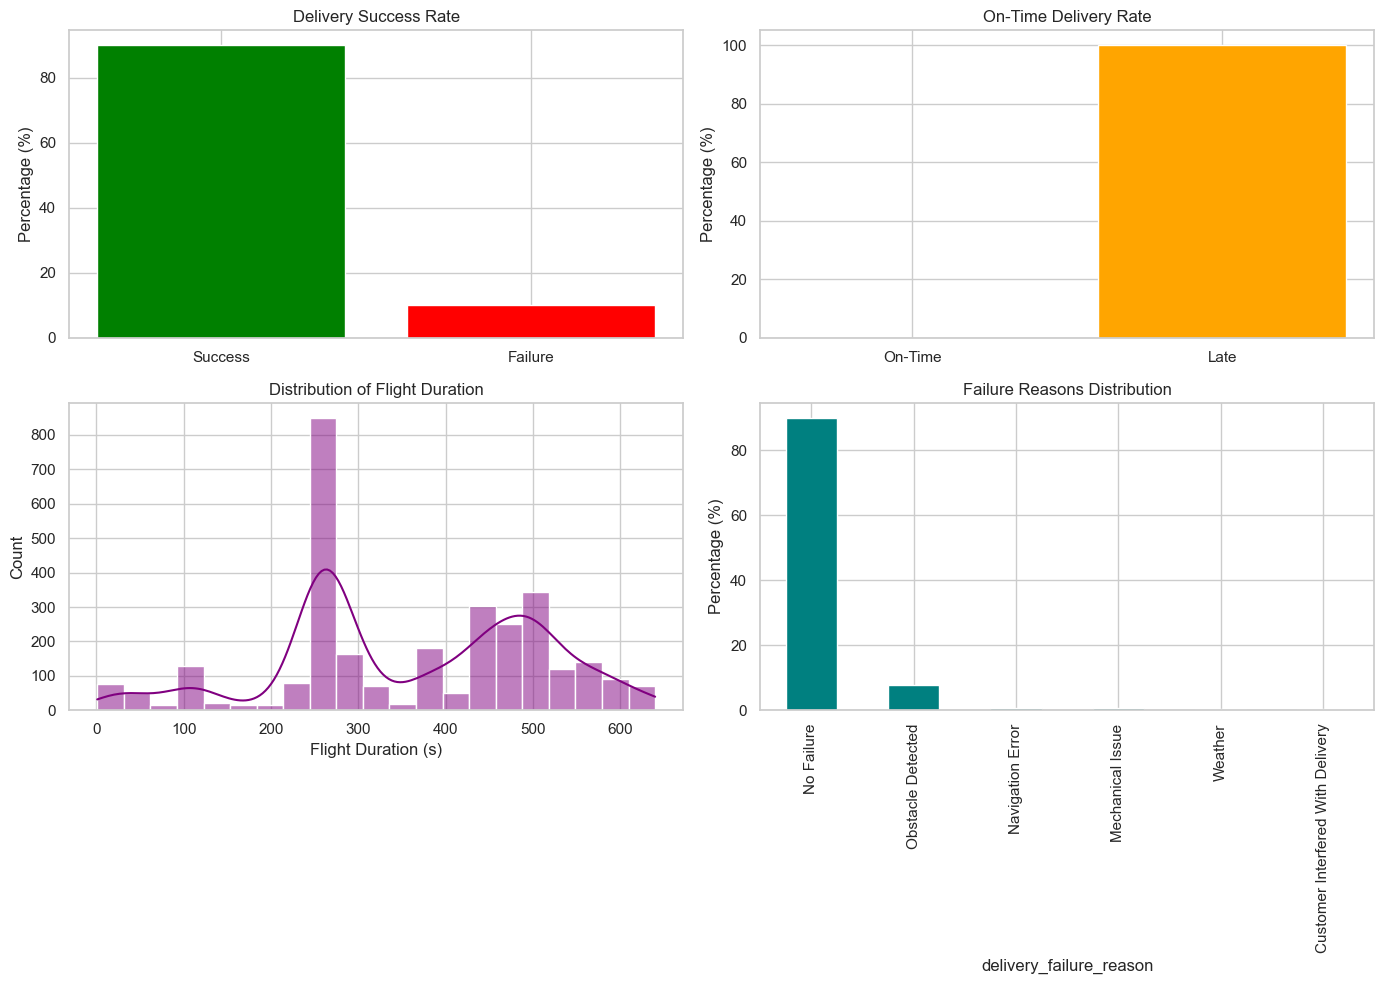

In [24]:
# Visualization 1: Delivery Success Rate vs On-Time Delivery Rate
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Delivery Success Rate
axes[0].bar(["Success", "Failure"], [success_rate, 100 - success_rate], color=['green', 'red'])
axes[0].set_title("Delivery Success Rate")
axes[0].set_ylabel("Percentage (%)")

# On-Time Delivery Rate
axes[1].bar(["On-Time", "Late"], [on_time_rate, 100 - on_time_rate], color=['blue', 'orange'])
axes[1].set_title("On-Time Delivery Rate")
axes[1].set_ylabel("Percentage (%)")

# Average Flight Duration Distribution
sns.histplot(flight_summary_data['flight_duration_s'], kde=True, ax=axes[2], color='purple')
axes[2].set_title("Distribution of Flight Duration")
axes[2].set_xlabel("Flight Duration (s)")

# Failure Reasons
failure_reasons.plot(kind='bar', ax=axes[3], color='teal')
axes[3].set_title("Failure Reasons Distribution")
axes[3].set_ylabel("Percentage (%)")

plt.tight_layout()
plt.show()

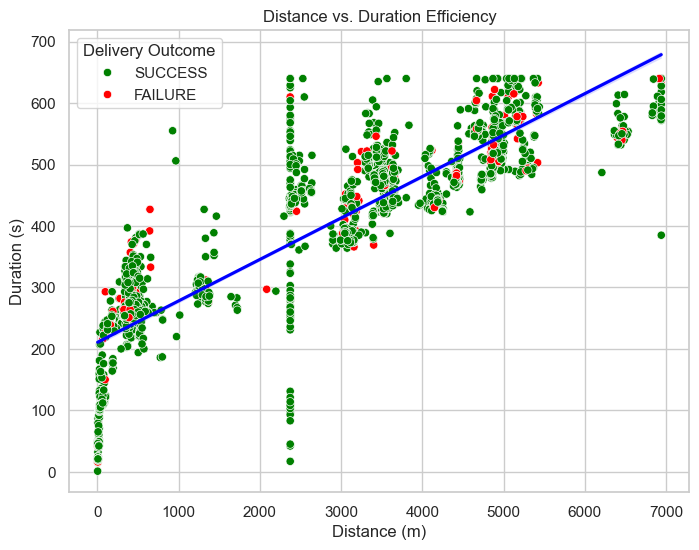

In [25]:
# Visualization 2: Distance vs. Duration Efficiency
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=flight_summary_data,
    x='ground_based_distance_m',
    y='flight_duration_s',
    hue='delivery_outcome',
    palette={'SUCCESS': 'green', 'FAILURE': 'red'}
)
sns.regplot(
    data=flight_summary_data,
    x='ground_based_distance_m',
    y='flight_duration_s',
    scatter=False,
    color='blue',
    line_kws={'label': 'Correlation Line'}
)
plt.title("Distance vs. Duration Efficiency")
plt.xlabel("Distance (m)")
plt.ylabel("Duration (s)")
plt.legend(title="Delivery Outcome")
plt.show()